# Algorithmic Trading in Python, R, STATA

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import pandas_datareader
from pandas_datareader import data

In [2]:
df = data.get_data_yahoo('MSFT', '2018-01-01', '2020-01-01')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,86.309998,85.500000,86.129997,85.949997,22483800.0,82.004974
2018-01-03,86.510002,85.970001,86.059998,86.349998,26061400.0,82.386620
2018-01-04,87.660004,86.570000,86.589996,87.110001,21912000.0,83.111740
2018-01-05,88.410004,87.430000,87.660004,88.190002,23407100.0,84.142174
2018-01-08,88.580002,87.599998,88.199997,88.279999,22113000.0,84.228027


### Pulling data using quandl

In [3]:
import quandl

In [4]:
aapl = quandl.get('WIKI/AAPL', start_date='2015-01-01', end_date='2020-01-01')
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,53204626.0,0.0,1.0,105.820966,105.868466,101.982949,103.863957,53204626.0
2015-01-05,108.29,108.65,105.410,106.25,64285491.0,0.0,1.0,102.875953,103.217954,100.139941,100.937944,64285491.0
2015-01-06,106.54,107.43,104.630,106.26,65797116.0,0.0,1.0,101.213446,102.058949,99.398938,100.947444,65797116.0
2015-01-07,107.20,108.20,106.695,107.75,40105934.0,0.0,1.0,101.840448,102.790453,101.360696,102.362951,40105934.0
2015-01-08,109.23,112.15,108.700,111.89,59364547.0,0.0,1.0,103.768957,106.542969,103.265455,106.295968,59364547.0


## Using the describe function to get statistical summary 

In [5]:
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,812.000000,812.000000,812.000000,812.000000,8.120000e+02,812.000000,812.0,812.000000,812.000000,812.000000,812.000000,8.120000e+02
mean,128.353458,129.392075,127.277417,128.365910,3.884222e+07,0.007500,1.0,125.904248,126.921413,124.851971,125.917574,3.884222e+07
std,24.340204,24.420871,24.230443,24.317795,1.944587e+07,0.064273,0.0,25.508143,25.600435,25.394430,25.491836,1.944587e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07,0.000000,1.0,87.955883,89.587953,87.437920,88.288161,1.147592e+07
25%,109.862500,110.887500,108.690000,109.662500,2.562962e+07,0.000000,1.0,106.659407,107.519235,105.583118,106.605229,2.562962e+07
50%,122.225000,123.495000,121.600000,122.130000,3.363873e+07,0.000000,1.0,118.153503,119.004077,117.159770,118.285727,3.363873e+07
75%,146.942500,147.647500,145.395000,146.715000,4.694093e+07,0.000000,1.0,146.293594,146.893824,144.669817,145.901000,4.694093e+07
max,182.590000,183.500000,180.210000,181.720000,1.622063e+08,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,1.622063e+08


In [6]:
## Visualizations

import matplotlib.pyplot as plt
plt.figure(figsize=[20,14])

<Figure size 1440x1008 with 0 Axes>

<Figure size 1440x1008 with 0 Axes>

In [7]:
## Creating a different variable

aapl['Change'] = aapl.Open - aapl.Close

In [8]:
## Creating a percent change variable

aapl['Perc'] = aapl.Change / aapl.Open

<AxesSubplot:xlabel='Date'>

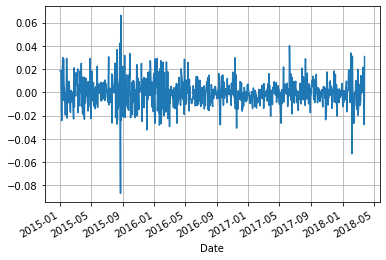

In [9]:
aapl['Perc'].plot(grid=True)

<AxesSubplot:xlabel='Date'>

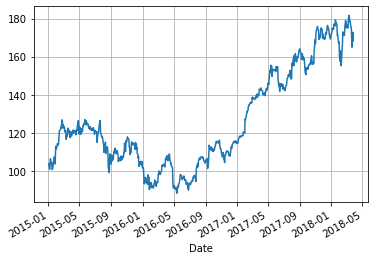

In [10]:
aapl['Adj. Close'].plot(grid=True)

# Making a reusable piece of code for stock data retreival

In [18]:
import pandas_datareader as pdr
import datetime

def get(tickers, startdate, enddate):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    dataset = map(data, tickers)
    return (pd.concat(dataset, keys=tickers, names=['Ticker', 'Date']))


In [19]:
tickers = ['MSFT','AAPL','JPM','CRM']
all_data=get(tickers, datetime.datetime(2015,1,1), datetime.datetime(2020,1,1))

all_data

High         Low        Open       Close      Volume  \
Ticker Date                                                                     
MSFT   2014-12-31   47.439999   46.450001   46.730000   46.450001  21552500.0   
       2015-01-02   47.419998   46.540001   46.660000   46.759998  27913900.0   
       2015-01-05   46.730000   46.250000   46.369999   46.330002  39673900.0   
       2015-01-06   46.750000   45.540001   46.380001   45.650002  36447900.0   
       2015-01-07   46.459999   45.490002   45.980000   46.230000  29114100.0   
...                       ...         ...         ...         ...         ...   
CRM    2019-12-24  163.839996  162.880005  163.309998  163.250000   1238000.0   
       2019-12-26  164.529999  163.270004  163.399994  164.509995   2155500.0   
       2019-12-27  165.460007  163.899994  164.860001  164.979996   3409900.0   
       2019-12-30  164.940002  161.199997  164.860001  162.440002   3197100.0   
       2019-12-31  163.259995  161.800003  162.039993  162.639999   3273500.0   

                    Adj Close  
Ticker Date                    
MSFT   2014-12-31   41.074078  
       2015-01-02   41.348206  
       2015-01-05   40.967976  
       2015-01-06   40.366688  
       2015-01-07   40.879539  
...                       ...  
CRM    2019-12-24  163.250000  
       2019-12-26  164.509995  
       2019-12-27  164.979996  
       2019-12-30  162.440002  
       2019-12-31  162.639999  

[5036 rows x 6 columns]

In [21]:
all_data.to_csv(r'Financial Data.csv')